PWC Stock price sentiment analysis using Twitter API
----------

Sentiment in the social media (facebook, twitter, instagram, linkedin etc.) plays a big role in managing the perception of an organisation. This sentiment can have an impact in the stock price of listed companies. Is there a statistically significant correlation (or even a lagged correlation) between the social media sentiment and the stock price. This will give the corporate communications department a very important tool to monitor the leading indicator (social media sentiment) in order to estimate the lagging indicator (stock price)

In [10]:
# Imports
import re
import tweepy
from tweepy import OAuthHandler
from textblob import TextBlob
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
import sys

In [3]:
# Twitter Client Class    
class TwitterClient(object):
    
    def __init__(self):
        # keys and tokens from the Twitter Dev Console
        consumer_key = 'Ve8tKh7aP2CtGhFUtV26W7Zr8'
        consumer_secret = 'P7L9hsifW5cRT4Yg9eJHzDtmi1RZ42ENSWwcKLp7SkegoG4TYT'
        access_token = '2918675084-KoiDatN9UJnvOKJxv4E2eFXmbh94GTiydawSf9w'
        access_token_secret = 'xpcA5NEFyGZ6WQZ5leXpBqHJDS8DlBBseQGqJpJQJU6Y9'
 
        # attempt authentication
        try:
            # create OAuthHandler object
            self.auth = OAuthHandler(consumer_key, consumer_secret)
            # set access token and secret
            self.auth.set_access_token(access_token, access_token_secret)
            # create tweepy API object to fetch tweets
            self.api = tweepy.API(self.auth)
        except:
            print("Error: Authentication Failed")
 
    def clean_tweet(self, tweet):
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
 
    def get_tweet_sentiment(self, tweet):
        # create TextBlob object of passed tweet text
        analysis = TextBlob(self.clean_tweet(tweet))
        # set sentiment
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'
 
    def get_tweets(self, query, count = 10):
        '''
        Main function to fetch tweets and parse them.
        '''
        # empty list to store parsed tweets
        tweets = []
 
        try:
            # call twitter api to fetch tweets
            fetched_tweets = self.api.search(q = query, count = count)
 
            # parsing tweets one by one
            for tweet in fetched_tweets:
                # empty dictionary to store required params of a tweet
                parsed_tweet = {}
 
                # saving text of tweet
                parsed_tweet['text'] = tweet.text
                # saving sentiment of tweet
                parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text)
 
                # appending parsed tweet to tweets list
                if tweet.retweet_count > 0:
                    # if tweet has retweets, ensure that it is appended only once
                    if parsed_tweet not in tweets:
                        tweets.append(parsed_tweet)
                else:
                    tweets.append(parsed_tweet)
 
            # return parsed tweets
            return tweets
 
        except tweepy.TweepError as e:
            # print error (if any)
            print("Error : " + str(e))

In [8]:
# Main function
def main():
    # creating object of TwitterClient Class
    api = TwitterClient()
    # calling function to get tweets
    query = input('Enter the stock name listed in BSE or NSE : ')
    epoch = int(input('Enter the number of tweets to be taken : '))
    tweets = api.get_tweets(query = query, count = epoch)
 
    # picking positive tweets from tweets
    ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
    # percentage of positive tweets
    print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets)))
    # picking negative tweets from tweets
    ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
    # percentage of negative tweets
    print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets)))
    # percentage of neutral tweets
    # print("Neutral tweets percentage: {} %".format(100*len(list(set(tweets) - set(ntweets) - set(ptweets)))/len(tweets)))
    netweets = [tweet for tweet in tweets if tweet['sentiment'] == 'neutral']
    print("Neutral tweets percentage: {} %".format(100*len(netweets)/len(tweets))) 

    # printing first 5 positive tweets
    print("\n\nPositive tweets:")
    for tweet in ptweets[:10]:
        print(tweet['text'])
 
    # printing first 5 negative tweets
    print("\n\nNegative tweets:")
    for tweet in ntweets[:10]:
        print(tweet['text'])

In [11]:
# Calling Main Function
if __name__ == "__main__":
    # calling main function
    main()

Enter the stock name listed in BSE or NSE : Rain Industries
Enter the number of tweets to be taken : 300
Positive tweets percentage: 52.87356321839081 %
Negative tweets percentage: 3.4482758620689653 %
Neutral tweets percentage: 43.67816091954023 %


Positive tweets:
@JAugastine Your suggestions rain industries and graphite india really helped. Thanks. Keep sharing valuable inputs.
Another good article on #RainInd 
https://t.co/Pa2Tq2u6mp
Track Aluminum prices here https://t.co/J5yvM8Laww
RT @Arvind2k: Rain Industries: Good results confirm strong tailwinds for carbon products in metal industry.
currently trading at a multiple…
Rain Industries: Good results confirm strong tailwinds for carbon products in metal industry.
currently trading at… https://t.co/CSdo57SXYB
Strong numbers by Rain Industries
@porinju Would anyone share their thoughts on Rain Industries. Worth getting in now for a 3 year view?? 
I am quite… https://t.co/9OSHOc74Wk
RT @GoldieTuteja: Rain Industries has changed the 

HTTPError: HTTP Error 505: HTTP Version Not Supported

                       open    high     low   close    volume
Date                                                         
2017-10-29 23:46:00  247.30  248.30  247.00  247.25   38733.0
2017-10-29 23:47:00  247.00  247.00  246.75  247.00   21355.0
2017-10-29 23:48:00  247.00  247.40  246.80  247.40   16167.0
2017-10-29 23:49:00  247.00  247.40  247.00  247.10   10365.0
2017-10-29 23:50:00  247.45  247.45  246.00  246.00   25893.0
2017-10-29 23:51:00  245.70  246.50  245.55  246.50    9769.0
2017-10-29 23:52:00  246.50  246.75  246.15  246.15    9574.0
2017-10-29 23:53:00  246.10  246.65  245.95  246.30    5155.0
2017-10-29 23:54:00  246.35  246.35  245.80  246.00   10845.0
2017-10-29 23:55:00  246.00  246.05  245.80  245.90   10519.0
2017-10-29 23:56:00  245.90  246.00  245.85  245.90    6573.0
2017-10-29 23:57:00  245.50  246.00  245.50  246.00    9846.0
2017-10-29 23:58:00  246.20  246.20  245.00  245.85   18657.0
2017-10-29 23:59:00  245.95  246.50  245.40  246.50    6255.0
2017-10-

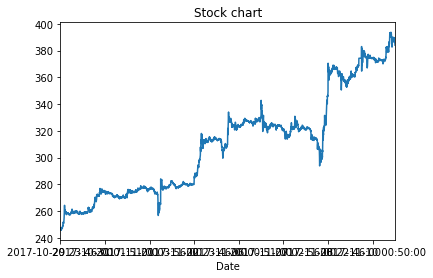

In [13]:
def stockchart(symbol):
    key = 'PD3O8KG4280HX51V'
    ts = TimeSeries(key=key, output_format='pandas')
    data, meta_data = ts.get_intraday(symbol=symbol,interval='1min', outputsize='full')
    print(data)
    data['close'].plot()
    plt.title('Stock chart')
    plt.show()
    
symbol = "Rain"
stockchart(symbol)    